In [1]:
import Magics.macro as magics
import xarray as xr

/usr/local/apps/python3/3.6.8-01/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
ds = xr.open_dataset('/home/graphics/cgs/netcdf-data/efas-cds.nc')
ds.dis24.plot()

In [3]:
ds

<xarray.Dataset>
Dimensions:                       (x: 1000, y: 950)
Coordinates:
  * y                             (y) float64 5.498e+06 5.492e+06 ... 7.525e+05
  * x                             (x) float64 2.502e+06 2.508e+06 ... 7.498e+06
    time                          datetime64[ns] ...
    step                          timedelta64[ns] ...
    surface                       int64 ...
    valid_time                    datetime64[ns] ...
Data variables:
    dis24                         (y, x) float32 ...
    latitude                      (y, x) float32 ...
    longitude                     (y, x) float32 ...
    lambert_azimuthal_equal_area  int32 ...
    land_binary_mask              (y, x) int8 ...
    upArea                        (y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    inst

In [5]:
projection = magics.mmap(
    subpage_clipping               = "on",
    subpage_lower_left_latitude    = 30.,
    subpage_lower_left_longitude   = -10.,
    subpage_map_projection         = 'cylindrical',
    subpage_upper_right_latitude   = 70,
    subpage_upper_right_longitude  = 30.,
    page_id_line                   = "off"
    
) 

light_background = magics.mcoast(map_coastline_sea_shade_colour= 'white',
                     map_coastline_land_shade_colour= 'cream',
                     map_grid= 'off',
                     map_coastline_land_shade= 'on',
                     map_coastline_sea_shade= 'on',
                     map_label= 'off',
                     map_coastline_colour= 'tan')

black_background = magics.mcoast(
    map_coastline_sea_shade         =   "on",
    map_coastline_land_shade_colour = "black",
    map_grid                        = "on",
    map_grid_line_style             = "dash",
    map_grid_colour                 = "white",
    map_coastline_land_shade        = "on",
    map_coastline_sea_shade_colour  = "rgb(0.15,0.15,0.15)",
    map_label                       = "on",
    map_coastline_colour            = "tan")

legend = magics.mlegend(
    legend_display_type   = "continuous",
    legend_box_mode       = "automatic",
    legend_box_y_position = 17.00,
    legend_box_x_length   = 32.0,
    legend_box_y_length   = 1.50,
    legend_text_colour    = "charcoal",
    legend_text_font_size = "0.4")

In [19]:
my_cont = magics.mcont(
  contour_shade                = "on",
  contour_shade_technique      = "grid_shading",
  contour_level_selection_type = 'level_list',
  contour_level_list           = [1.,10,50,100,500,1000,5000,10000,50000],
  contour_shade_colour_method  = "list",
  contour_shade_colour_list    = ['#ffffe0', '#caefdf', '#abdad9', '#93c4d2', '#7daeca', '#6997c2', '#5681b9', '#426cb0', '#2b57a7', '#00429d'],
  legend                       = 'on'
)

In [7]:
ds.time

<xarray.DataArray 'time' ()>
array('2018-12-28T06:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time        datetime64[ns] 2018-12-28T06:00:00
    step        timedelta64[ns] ...
    surface     int64 ...
    valid_time  datetime64[ns] ...
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time

In [11]:
data = magics.mnetcdf(    
    netcdf_filename                  = '/home/graphics/cgs/netcdf-data/efas-cds.nc',
    netcdf_type                      = "geomatrix",
    netcdf_latitude_variable         = "y",
    netcdf_longitude_variable        = "x",
    netcdf_value_variable            = "dis24"
    )

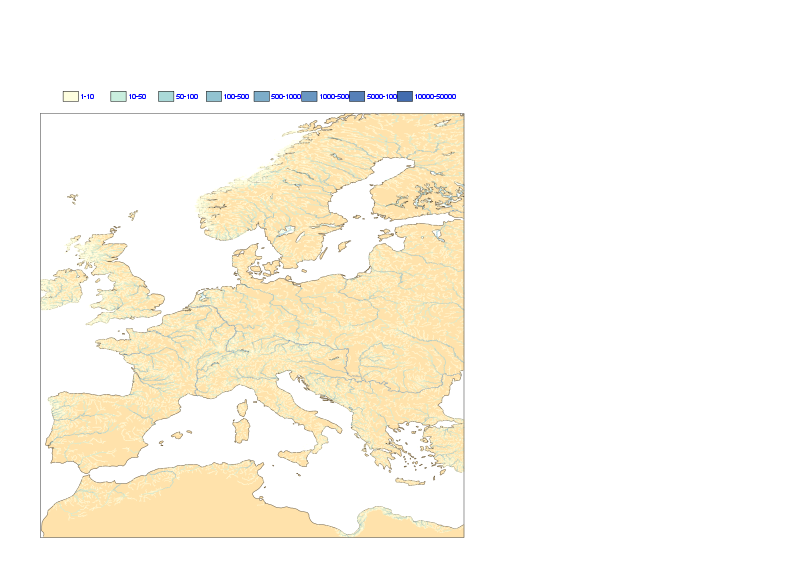

In [20]:
magics.plot(projection,light_background,data,my_cont)